In [2]:
%matplotlib inline

import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import datetime as dt

In [3]:
stations = pd.read_csv('Nice_Ride_2017_Station_Locations.csv')
trips = pd.read_csv('Nice_ride_trip_history_2017_season.csv')
weather = pd.read_csv('WeatherDailyMinneapolis2017.csv')

C:\Users\danny\Anaconda3\envs\env_3.5\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
trips['Start date'] = pd.to_datetime(trips['Start date'], format = "%m/%d/%Y %H:%M")
trips['End date'] = pd.to_datetime(trips['End date'], format = "%m/%d/%Y %H:%M")

trips_for_merge = trips
trips_for_merge['Start date'] = trips_for_merge['Start date'].dt.strftime('%Y-%m-%d')
trips_for_merge['End date'] = trips_for_merge['End date'].dt.strftime('%Y-%m-%d')

In [5]:
trips_for_merge.merge()

TypeError: merge() missing 1 required positional argument: 'right'

In [6]:
weather.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-01,0.00,26,18
1,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-02,0.00,31,20
2,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-03,0.01,30,25
3,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-04,0.00,25,-6
4,USC00218450,"UNIVERSITY OF MN ST. PAUL, MN US",2017-01-05,0.01,2,-8


In [50]:
weather_for_merge = weather[['DATE', 'TMAX', 'PRCP']]
weather_for_merge = weather_for_merge[weather_for_merge['DATE'].isin(trips_for_merge['End date'])]

In [51]:
bins = np.arange(min(weather_for_merge.TMAX)-1, max(weather_for_merge.TMAX)+5, 5)
weather_for_merge['max_temp_range'] = pd.cut(weather_for_merge.TMAX, bins, right = False)

In [52]:
trips_weather_df = trips_for_merge.merge(weather_for_merge, how = 'left', left_on = 'Start date', right_on = 'DATE')

In [53]:
trips_weather_by_day = trips_weather_df.groupby('DATE', as_index = False).agg({'Total duration (Seconds)': 'mean', 'TMAX': 'max', 
                                                        'max_temp_range': 'max', 'PRCP': 'max', 'Account type': 'count'})

In [74]:
agg_by_max_temp = trips_weather_df.groupby('max_temp_range', 
                                           as_index = False).agg({'Start date': 'count', 'Total duration (Seconds)': 'mean'})

In [67]:
agg_by_max_temp['max_temp_range'] = agg_by_max_temp['max_temp_range'].astype(str).str.split(",", 
                                                                                            expand = True)[0].str.split("[", expand = True)[1].astype(int)

In [78]:
x = agg_by_max_temp['max_temp_range'].astype(str).str.split(",", expand = True)[0].str.split("[", expand = True)[1].astype(int)
y1 = agg_by_max_temp['Start date']
y2 = agg_by_max_temp['Total duration (Seconds)']

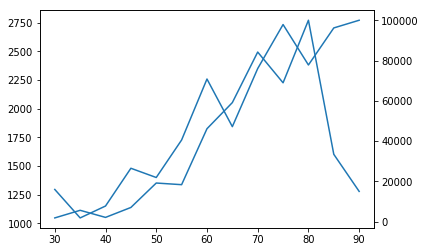

In [79]:
fig, ax1 = plt.subplots()

ax1.plot(x, y2)

ax2 = ax1.twinx()

ax2.plot(x, y1)

plt.show()

In [84]:
trips_weather_by_day.groupby('PRCP', as_index = False).agg({'Total duration (Seconds)': 'mean', 'TMAX': 'mean', 'Account type': 'sum'})

,PRCP,TMAX,Account type,Total duration (Seconds)
0,0.00,69.947761,311907,2109.821271
1,0.01,72.857143,16437,1894.031186
2,0.02,65.250000,7512,1967.791861
3,0.03,66.000000,8194,3504.734463
4,0.04,66.200000,9967,3321.908011
5,0.05,68.500000,8188,4267.453541
6,0.06,63.000000,6992,1497.192966
7,0.09,65.000000,1881,2779.281765
8,0.10,53.000000,3194,1305.875886
9,0.11,71.333333,4915,2260.675437


In [121]:
trips_weather_by_day.groupby('PRCP')

,PRCP,TMAX,Total duration (Seconds),Account type
0,0.00,9373,282716.050342,311907
1,0.01,510,13258.218305,16437
2,0.02,261,7871.167442,7512
3,0.03,264,14018.937852,8194
4,0.04,331,16609.540053,9967
5,0.05,274,17069.814163,8188
6,0.06,189,4491.578899,6992
7,0.09,65,2779.281765,1881
8,0.10,159,3917.627657,3194
9,0.11,214,6782.026312,4915


In [103]:
agg_by_precip = trips_weather_df.groupby('PRCP', as_index = False).agg({'Total duration (Seconds)': 'mean', 'TMAX': 'mean', 'Account type': 'count'})

In [98]:
agg_by_precip.head()

,PRCP,TMAX,Account type,Total duration (Seconds)
0,0.00,73.365670,311907,2298.421738
1,0.01,74.132810,16437,2021.535134
2,0.02,67.616480,7512,2173.169063
3,0.03,66.492311,8194,3221.556383
4,0.04,72.649243,9967,2919.880506


In [104]:
x = agg_by_precip['PRCP']
y1 = agg_by_precip['Account type']
y2 = agg_by_precip['Total duration (Seconds)']

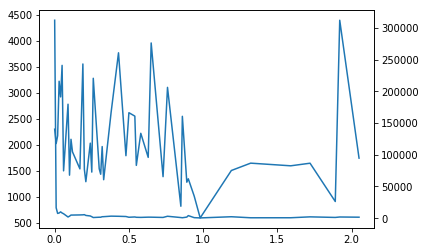

In [107]:
fig, ax1 = plt.subplots()

ax1.plot(x, y2)

ax2 = ax1.twinx()

ax2.plot(x, y1)

plt.show()

In [91]:
trips_weather_df.head(1)

,Start date,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds),DATE,TMAX,PRCP,max_temp_range
0,2017-11-05,Hennepin Ave & S Washington Ave,30184,2017-11-05,Logan Park,30104,Member,1048,2017-11-05,41,0.1,"[40, 45)"


In [156]:
agg_by_max_temp

,max_temp_range,Start date,Total duration (Seconds)
0,"(30, 35]",3860,1143.195078
1,"(35, 40]",3548,1068.884160
2,"(40, 45]",2504,1053.614617
3,"(45, 50]",12775,1426.892759
4,"(50, 55]",14354,1375.171520
5,"(55, 60]",28701,2059.016027
6,"(60, 65]",45251,2213.742636
7,"(65, 70]",71741,1916.400217
8,"(70, 75]",74716,2552.597743
9,"(75, 80]",84278,2622.851717


In [130]:
trips_weather_df.head(1)

,Start date,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds),DATE,TMAX,PRCP,max_temp_range
0,2017-11-05,Hennepin Ave & S Washington Ave,30184,2017-11-05,Logan Park,30104,Member,1048,2017-11-05,41,0.1,"(40, 45]"


In [3]:
stations['Location'] = list(zip(stations['Latitude'], stations['Longitude']))

In [4]:
stations.head(1)

,Number,Name,Latitude,Longitude,Total docks,Location
0,30000,100 Main Street SE,44.984892,-93.256551,27,"(44.984891999999995, -93.256551)"


In [5]:
trips.head(1)

,Start date,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds)
0,2017-11-05 21:45:00,Hennepin Ave & S Washington Ave,30184,2017-11-05 22:02:00,Logan Park,30104,Member,1048


In [115]:
location_merge = stations[['Name', 'Location']]
trips_merged = trips.merge(location_merge, how = 'left', left_on = 'Start station', 
            right_on = 'Name').merge(location_merge, how = 'left', left_on = 'End station', right_on = 'Name')

KeyError: "['Location'] not in index"

In [7]:
trips_merged.drop(labels = ['Name_x', 'Name_y'], axis = 1, inplace = True)

In [8]:
trips_merged.rename({'Location_x': 'Start Location', 'Location_y': 'End Location'}, axis = 'columns', inplace = True)

In [9]:
trips_merged

,Start date,Start station,Start station number,End date,End station,End station number,Account type,Total duration (Seconds),Start Location,End Location
0,2017-11-05 21:45:00,Hennepin Ave & S Washington Ave,30184,2017-11-05 22:02:00,Logan Park,30104,Member,1048,"(44.981895, -93.269195)","(44.99882, -93.25276)"
1,2017-11-05 21:45:00,Broadway Street N & 4th Street E,30122,2017-11-05 22:26:00,Broadway Street N & 4th Street E,30122,Member,2513,"(44.94965, -93.0845)","(44.94965, -93.0845)"
2,2017-11-05 21:43:00,Dale Street & Grand Ave.,30106,2017-11-05 22:13:00,N Milton Street & Summit Ave,30101,Member,1817,"(44.939778999999994, -93.126261)","(44.941599, -93.138832)"
3,2017-11-05 21:41:00,Weisman Art Museum,30183,2017-11-05 22:05:00,22nd Ave S & Franklin Ave,30014,Casual,1399,"(44.973607, -93.23725400000001)","(44.96293, -93.24104200000001)"
4,2017-11-05 21:38:00,South 2nd Street & 3rd Ave S,30030,2017-11-05 21:44:00,6th Ave SE & University Ave,30088,Member,370,"(44.98092673, -93.26345444)","(44.983281, -93.24812)"
5,2017-11-05 21:34:00,15th Ave SE & 4th Street SE,30197,2017-11-05 21:39:00,Oak Street Ramp,30034,Member,342,"(44.979878, -93.234739)","(44.97202, -93.22697)"
6,2017-11-05 21:33:00,Hennepin Ave & S Washington Ave,30184,2017-11-05 21:43:00,Washington & Cedar,30015,Member,617,"(44.981895, -93.269195)","(44.973440000000004, -93.24748000000001)"
7,2017-11-05 21:30:00,Bryant Ave N & West Broadway,30067,2017-11-05 21:52:00,N Washington Ave & 9th Ave N,30065,Member,1343,"(44.999340999999994, -93.290941)","(44.98987911, -93.27978373)"
8,2017-11-05 21:27:00,N Milton Street & Summit Ave,30101,2017-11-05 21:41:00,Dale Street & Grand Ave.,30106,Member,838,"(44.941599, -93.138832)","(44.939778999999994, -93.126261)"
9,2017-11-05 21:16:00,7th Street & 4th Ave S,30051,2017-11-05 21:25:00,West 15th Street & Willow,30093,Casual,559,"(44.97497, -93.266684)","(44.968237, -93.281991)"


In [10]:
start_station_trips = DataFrame(trips.groupby('Start station')['Start date'].count())
start_station_trips.rename({'Start date': 'Outbound Trips in 2017'}, axis = 'columns', inplace = True)

end_station_trips = DataFrame(trips.groupby('End station')['End date'].count())
end_station_trips.rename({'End date': 'Inbound Trips in 2017'}, axis = 'columns', inplace = True)

In [11]:
all_trips = start_station_trips.merge(end_station_trips, left_index = True, right_index = True)
all_trips.index.names = ['Station']

In [12]:
all_trips['Total Trips in 2017'] = all_trips['Outbound Trips in 2017'] + all_trips['Inbound Trips in 2017']

In [13]:
top_10_in = DataFrame(all_trips.sort_values(by = 'Inbound Trips in 2017', ascending = False)['Inbound Trips in 2017'].head(10))
top_10_out = DataFrame(all_trips.sort_values(by = 'Outbound Trips in 2017', ascending = False)['Outbound Trips in 2017'].head(10))
bottom_10_in = DataFrame(all_trips.sort_values(by = 'Inbound Trips in 2017')['Inbound Trips in 2017'].head(10))
bottom_10_out = DataFrame(all_trips.sort_values(by = 'Outbound Trips in 2017')['Outbound Trips in 2017'].head(10))

In [14]:
top_bottom_in = pd.concat([top_10_in, bottom_10_in])
top_bottom_out = pd.concat([top_10_out, bottom_10_out])

location_merge = stations[['Name', 'Location']]
top_bottom_in = top_bottom_in.merge(location_merge, how = 'left', left_index = True, right_on = 'Name')
top_bottom_out = top_bottom_out.merge(location_merge, how = 'left', left_index = True, right_on = 'Name')

In [114]:
avg1 = float(top_bottom_in.mean())
avg2 = float(top_bottom_out.mean())

folium_map = folium.Map(location=[44.980831, -93.240282],
                        zoom_start=13,
                        tiles="CartoDB positron")

for index, row in top_bottom_in.iterrows():
    name = row['Name']
    inbound = row['Inbound Trips in 2017']
    
    popup_text = """
                Name: {}<br> 
                Total Inbound Trips: {}<br>"""
    popup_text = popup_text.format(name,
                               inbound)
    
    if inbound > avg1:
        color = "#7a0019" # maroon
        radius = 10
    else:
        color = "#ffcc33" # gold
        radius = 10
    folium.CircleMarker(location=row['Location'], radius = radius, color = color, tooltip=popup_text).add_to(folium_map)
    
for index, row in top_bottom_out.iterrows():
    name = row['Name']
    outbound = row['Outbound Trips in 2017']
    
    popup_text = """
                Name: {}<br> 
                Total Outbound Trips: {}<br>"""
    popup_text = popup_text.format(name,
                               inbound)
    
    
    if outbound > avg2:
        color = "#7a0019" # maroon
        radius = 15
    else:
        color = "#ffcc33" # gold
        radius = 15
    folium.CircleMarker(location=row['Location'], radius = radius, color = color, tooltip=popup_text).add_to(folium_map)
    
folium_map

NameError: name 'top_bottom_in' is not defined

In [16]:
stations = stations.merge(all_trips, how = 'left', left_on = 'Name', right_index = True)

In [17]:
low = min(stations['Total Trips in 2017'])
high = max(stations['Total Trips in 2017'])
count = len(stations['Total Trips in 2017'])
print(low)
print(high)
print(count)

317
22405
202


In [18]:
trips_merged.groupby(['Start station', 'End station'], 
                     as_index = False).count().sort_values(by = 'Start date', ascending = False).head(10)

,Start station,End station,Start date,Start station number,End date,End station number,Account type,Total duration (Seconds),Start Location,End Location
10399,Lake Street & Knox Ave S,Lake Street & Knox Ave S,4853,4853,4853,4853,4853,4853,4853,4853
9947,Lake Calhoun Center,Lake Calhoun Center,3171,3171,3171,3171,3171,3171,3171,3171
10100,Lake Harriet Bandshell,Lake Harriet Bandshell,2650,2650,2650,2650,2650,2650,2650,2650
10034,Lake Como Pavilion,Lake Como Pavilion,2156,2156,2156,2156,2156,2156,2156,2156
17289,W 36th Street & W Calhoun Parkway,W 36th Street & W Calhoun Parkway,2037,2037,2037,2037,2037,2037,2037,2037
19057,Willey Hall,Weisman Art Museum,1857,1857,1857,1857,1857,1857,1857,1857
18335,Weisman Art Museum,Willey Hall,1832,1832,1832,1832,1832,1832,1832,1832
12964,Minnehaha Park,Minnehaha Park,1647,1647,1647,1647,1647,1647,1647,1647
18315,Weisman Art Museum,Social Sciences,1574,1574,1574,1574,1574,1574,1574,1574
10180,Lake Nokomis,Lake Nokomis,1361,1361,1361,1361,1361,1361,1361,1361


In [19]:
trips_merged.groupby(['Start station', 'End station'], 
                     as_index = False).mean().sort_values(by = 'Total duration (Seconds)', ascending = False).head(10)

,Start station,End station,Total duration (Seconds)
15070,Rice Street & University Ave W,Fairview Ave & University Ave,11354802.0
18830,West Broadway & Logan Ave N,Mpls Convention Center,6990559.0
10754,Logan Park,Franklin & 11th Ave,4369185.5
8335,Girard Ave N & W Broadway Ave,Mpls Convention Center,3495688.5
5221,Bryant Ave N & West Broadway,10th Street E & Cedar Street,3311125.0
15054,Rice Street & University Ave W,100 Main Street SE,3086878.0
18833,West Broadway & Logan Ave N,Nice Ride World Headquarters,2764452.0
18820,West Broadway & Logan Ave N,Hennepin & Laurel Ave,2661870.0
13575,N Victoria Street & University Ave,N 4th Ave & W River Parkway,2626497.0
8350,Girard Ave N & W Broadway Ave,West 36th Street & Bryant Ave S,2614778.0


In [20]:
average_docks = stations['Total docks'].mean()
folium_map = folium.Map(location=[44.980831, -93.240282],
                        zoom_start=13,
                        tiles="CartoDB positron")

for index, row in stations.iterrows():
    total_docks = row['Total docks']
    radius = total_docks/2
    
    popup_text = """
                Name: {}<br> 
                Total docks: {}<br>"""
    popup_text = popup_text.format(row["Name"],
                               row["Total docks"])
    
    
    if total_docks > average_docks:
        color = "#7a0019" # gold
    else:
        color = "#ffcc33" # maroon
    folium.CircleMarker(location=row['Location'], radius = radius, color = color, tooltip=popup_text).add_to(folium_map)
    
folium_map

In [75]:
stations[stations['Number'] == '30090']

,Number,Name,Latitude,Longitude,Total docks,Location
87,30090,Portland Ave & Washington Ave,44.978068,-93.26023,19,"(44.978068, -93.26023)"


C:\Users\monca016\AppData\Local\Continuum\anaconda3\envs\env_full\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


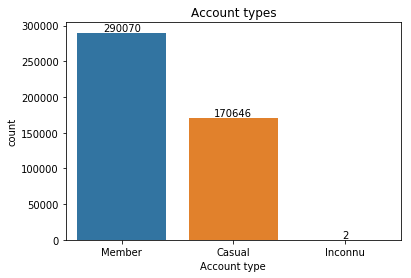

In [12]:
ax = sns.countplot(x='Account type', data=trips)
plt.title('Account types')
for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1,1]
    ax.annotate('%d' % (y), (x.mean(), y), 
                ha='center', va='bottom')
plt.show()



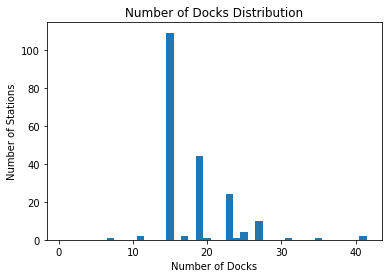

In [7]:
plt.figure()
plt.hist(stations['Total docks'], 
         bins=np.arange(0.5, 42.5, 1.))
plt.ylabel('Number of Stations')
plt.xlabel('Number of Docks')
plt.title('Number of Docks Distribution')
plt.show()